In [72]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, List

def estimate_pi(num_points: int = 10000) -> Tuple[float, List[float]]:
    """
    Estimate π using Monte Carlo simulation by comparing points inside/outside a circle.
    Returns the final estimate and a list of running estimates for visualization.
    """
    inside_circle = 0
    estimates = []
    
    # Generate random points in a 1x1 square
    x = np.random.uniform(0, 1, num_points)
    y = np.random.uniform(0, 1, num_points)
    
    for i in range(num_points):
        # Check if point is inside the quarter circle
        if x[i]**2 + y[i]**2 <= 1:
            inside_circle += 1
        
        # Calculate running estimate
        if i > 0:
            pi_estimate = 4 * inside_circle / (i + 1)
            estimates.append(pi_estimate)
    
    return 4 * inside_circle / num_points, estimates

def visualize_simulation(num_points: int = 1000):
    """
    Visualize the Monte Carlo simulation for π estimation.
    """
    # Generate points
    x = np.random.uniform(0, 1, num_points)
    y = np.random.uniform(0, 1, num_points)
    
    # Determine which points fall inside the quarter circle
    inside = x**2 + y**2 <= 1
    
    # Create plot
    plt.figure(figsize=(12, 5))
    
    # Plot points
    plt.subplot(121)
    plt.scatter(x[inside], y[inside], c='blue', label='Inside')
    plt.scatter(x[~inside], y[~inside], c='red', label='Outside')
    plt.axis('equal')
    plt.grid(True)
    plt.legend()
    plt.title('Monte Carlo Points')
    
    # Plot convergence
    final_estimate, estimates = estimate_pi(num_points)
    plt.subplot(122)
    plt.plot(estimates)
    plt.axhline(y=np.pi, color='r', linestyle='--', label='True π')
    plt.grid(True)
    plt.legend()
    plt.title('Convergence of π Estimate')
    
    plt.tight_layout()
    plt.show()

# Example usage of integration using Monte Carlo
def monte_carlo_integration(func, a: float, b: float, num_points: int = 10000) -> float:
    """
    Estimate the integral of a function using Monte Carlo sampling.
    
    Args:
        func: Function to integrate
        a: Lower bound
        b: Upper bound
        num_points: Number of random points to use
    
    Returns:
        Estimated integral value
    """
    x = np.random.uniform(a, b, num_points)
    y = func(x)
    return (b - a) * np.mean(y)

# Example of using Monte Carlo for optimization
def monte_carlo_optimization(func, bounds: List[Tuple[float, float]], 
                           num_points: int = 1000) -> Tuple[float, float]:
    """
    Find the minimum of a function using random sampling.
    
    Args:
        func: Function to minimize
        bounds: List of (min, max) tuples for each dimension
        num_points: Number of random points to sample
    
    Returns:
        Tuple of (minimum value, position of minimum)
    """
    dims = len(bounds)
    points = np.array([np.random.uniform(low, high, num_points) 
                      for low, high in bounds]).T
    
    values = np.array([func(p) for p in points])
    min_idx = np.argmin(values)
    
    return values[min_idx], points[min_idx]


In [73]:

# Estimate π and visualize
print("\nEstimating π...")
final_estimate, _ = estimate_pi(100000)
print(f"Estimated value of π: {final_estimate:.6f}")
print(f"Actual value of π: {np.pi:.6f}")

# Demonstrate integration
print("\nDemonstrating integration...")
func = lambda x: np.sin(x)  # Function to integrate
result = monte_carlo_integration(func, 0, np.pi, 100000)
print(f"Estimated integral of sin(x) from 0 to π: {result:.6f}")
print(f"Actual value: 2.000000")

# Demonstrate optimization
print("\nDemonstrating optimization...")
# Example function to minimize: x^2 + y^2
func_2d = lambda p: p[0]**2 + p[1]**2
bounds = [(-5, 5), (-5, 5)]
min_val, min_pos = monte_carlo_optimization(func_2d, bounds, 10000)
print(f"Found minimum value: {min_val:.6f} at position: {min_pos}")


Estimating π...
Estimated value of π: 3.148760
Actual value of π: 3.141593

Demonstrating integration...
Estimated integral of sin(x) from 0 to π: 2.002327
Actual value: 2.000000

Demonstrating optimization...
Found minimum value: 0.003356 at position: [ 0.02320817 -0.05307949]


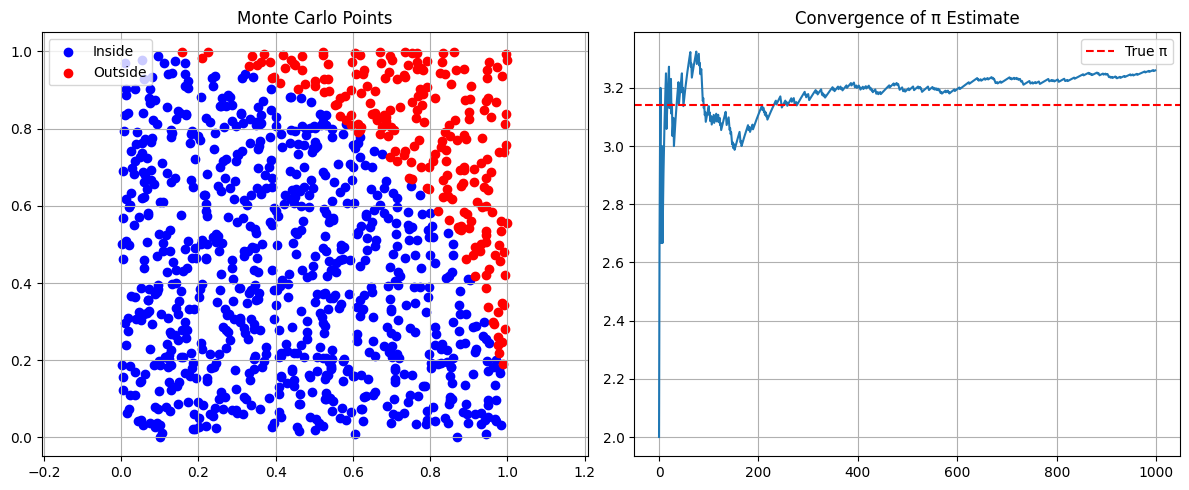

In [74]:
visualize_simulation(1000)


In [78]:
print(samples)

[0.31026862 0.22144744 0.39031321 0.51598409 0.50676286 0.75452368
 0.18917186 0.94647283 0.34284511 0.30024885 0.68517858 0.80551663
 0.37847176 0.74684697 0.88373596 0.76680367 0.03419649 0.82736891
 0.77448096 0.66929024 0.76002242 0.9794254  0.43111289 0.06722323
 0.46088997 0.04643366 0.29425041 0.58687979 0.30962289 0.68539525
 0.82198633 0.42043918 0.90013795 0.07983893 0.84011316 0.82857315
 0.3219939  0.29871519 0.30509498 0.81139371 0.83165349 0.32972246
 0.59259035 0.13893323 0.46877874 0.99879285 0.15883915 0.94756264
 0.82425472 0.97221465 0.17957876 0.21351849 0.01686718 0.72470181
 0.64409469 0.17806544 0.79114497 0.29919551 0.13499557 0.42256267
 0.09096985 0.26324366 0.37133336 0.85186417 0.79254874 0.44275429
 0.72457506 0.56864964 0.34084186 0.72587434 0.68349915 0.61909444
 0.61795552 0.68298199 0.38454551 0.86907582 0.16230785 0.88388546
 0.34228184 0.12503162 0.6000274  0.37598667 0.81549973 0.43078547
 0.66856253 0.30825799 0.20945238 0.38804903 0.60680783 0.6569

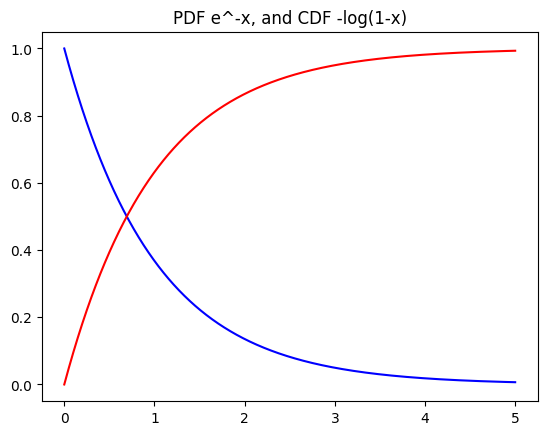

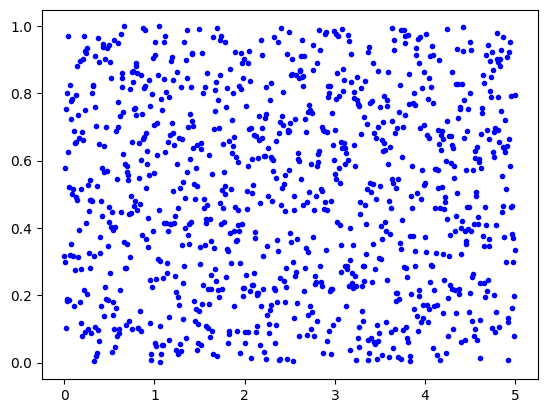

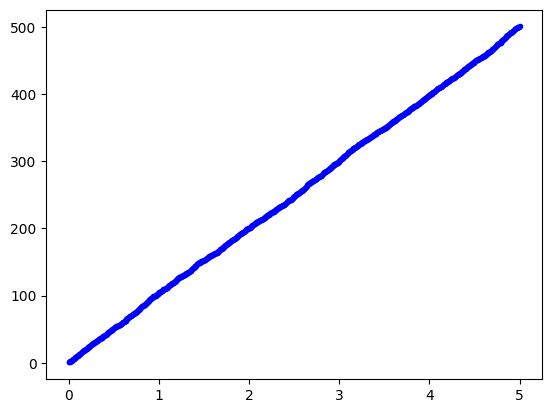

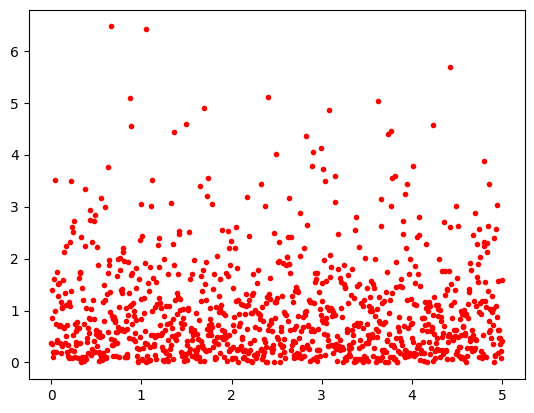

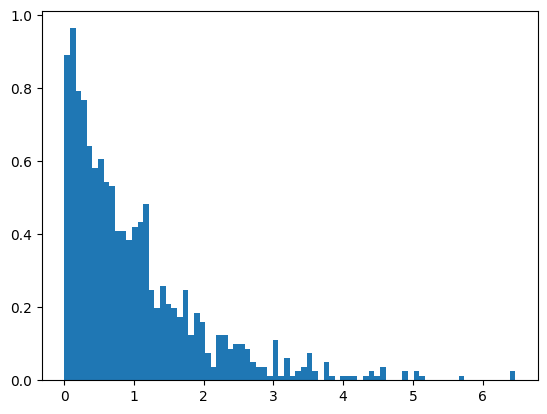

In [102]:
def f(x):
  return np.exp(-x)
def cdf(x):
  return 1-np.exp(-x)
def inv_cdf(x):
  return -np.log(1-x)

samples = np.random.uniform(0, 1, 1000)
x = np.linspace(0, 5, len(samples))

# plt.subplot(131)
plt.plot(x, f(x), 'b-', label='f(x)')
# plt.show()
plt.plot(x, cdf(x), 'r-', label='f(x)')
plt.title("PDF e^-x, and CDF -log(1-x)")
plt.show()
plt.plot(x, samples, 'b.', label='f(x)')
plt.title("Samples from uniform distribution")
plt.show()
plt.plot(x, np.cumsum(samples), 'b.', label='f(x)')
plt.title("Cumulative sum of uniform samples - its CDF")
plt.show()
plt.plot(x, inv_cdf(samples), 'r.', label='f(x)')
plt.title("The CDF -log(1-x) applied to uniform samples")
plt.show()
# plt.plot(x, proposal_distribution(x), 'r--', label='Proposal Distribution')
plt.hist(inv_cdf(samples), bins=80, density=True, label='Samples')
plt.title("Histogram of samples")
plt.show()
# plt.legend()
# plt.title('Distributions and Samples')

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# This is probably a poor function for a demonstration of importance sampling, because the mean is in the middle of the two distributions.
# It would be more valuable to have a distribution with a long tail, or p(x)f(x) with a range of values where f is high and p is low

def target_distribution(x):
    """
    Our target distribution: a mixture of two Gaussians
    This represents the distribution we want to sample from but is "difficult"
    """
    return 0.3 * np.exp(-(x - 2)**2 / 0.5) + 0.7 * np.exp(-(x + 2)**2 / 0.5)

def proposal_distribution(x):
    """
    Our proposal distribution: a wider Gaussian mixture
    This is our "easier" distribution that we'll actually sample from
    """
    return 0.3 * np.exp(-(x - 2)**2 / 2) + 0.7 * np.exp(-(x + 2)**2 / 2)

# Set random seed for reproducibility
# np.random.seed(42)

# Number of samples
n_samples = 10000


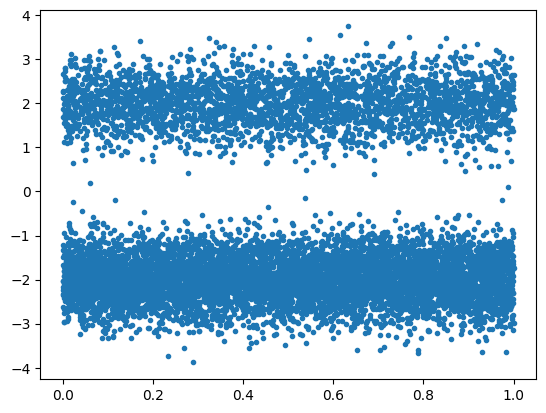

In [145]:
np.random.seed()
def r_sample(target, proposal, x_low=-5, x_high=5):
    """
    Args
    - target: function to evaluate PDF of target distribution at a value
    - proposal: function to evaluate PDF of proposal distribution at a value
    - x_low: the minimum x value to sample
    - x_high: the maximum x value to sample
    Returns
    - a single sample from the target distribution
    """
    while True:
      x = np.random.uniform(x_low, x_high, 1)
      t = target(x)
      p = proposal(x, x_low, x_high)
      u = np.random.uniform(0, p, 1)
      if u <= t:
        return x

def proposal_uniform(x, scale=1, x_low=-5, x_high=5):
   return scale if x >= x_low or x <= x_high else 0

n_samples = 1000
x = np.linspace(0, 1, n_samples)
target_samples = [r_sample(target_distribution, lambda x, x_low, x_high: proposal_uniform(x, scale=0.71, x_low=x_low, x_high=x_high), x_low=-10, x_high=10) for _ in range(n_samples)]  
plt.plot(x, target_samples, '.')

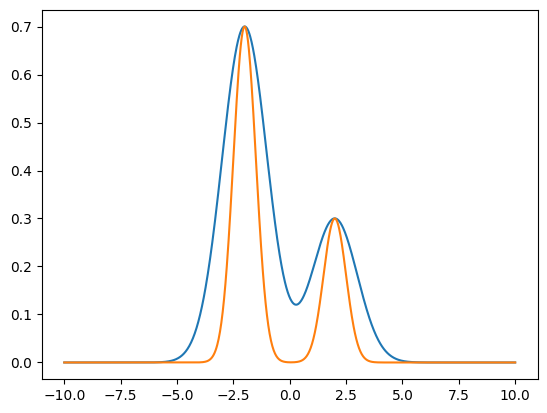

In [140]:
x = np.linspace(-10, 10, 1000)
plt.plot(x, proposal_distribution(x))
plt.plot(x, target_distribution(x))

In [123]:
np.random.uniform(-5, 5, 1)

array([-1.78213759])

In [155]:

# Generate samples and compute estimates
x = np.linspace(-6, 6, 1000)
# samples = generate_proposal_samples(n_samples)
samples = np.array([r_sample(proposal_distribution, lambda x, x_low, x_high: proposal_uniform(x, scale=0.71, x_low=x_low, x_high=x_high), x_low=-10, x_high=10) for _ in x]  )


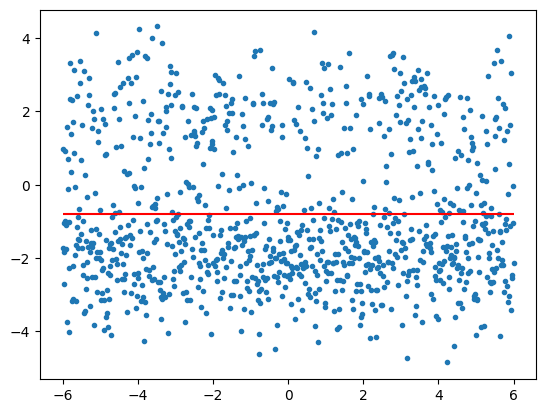

In [162]:
plt.plot(x, samples, '.')
plt.hlines(np.mean(samples), -6, 6, 'r')

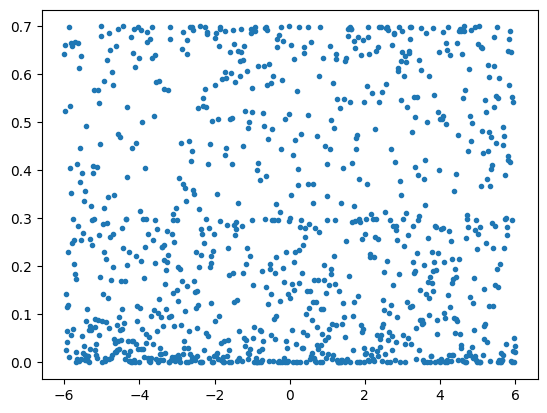

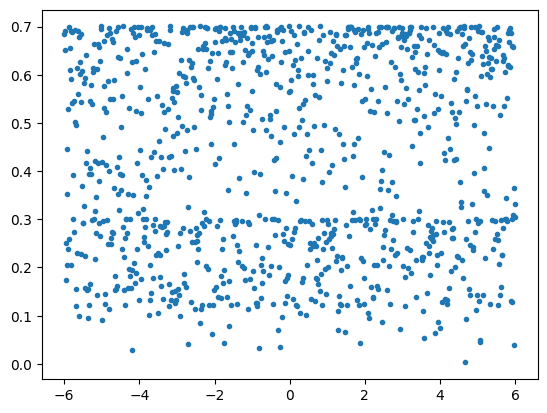

In [152]:
plt.plot(x, target_distribution(samples), '.')
plt.show()
plt.plot(x, proposal_distribution(samples), '.')

# target_distribution(samples) / proposal_distribution(samples)

In [ ]:
t_samples = np.array([r_sample(target_distribution, lambda x, x_low, x_high: proposal_uniform(x, scale=0.71, x_low=x_low, x_high=x_high), x_low=-10, x_high=10) for _ in x]  )
regular_mc_mean = np.mean(t_samples)
plt.plot(x, )

True mean: -0.8000
Regular MC estimate: -0.6660
Importance Sampling estimate: -0.8570


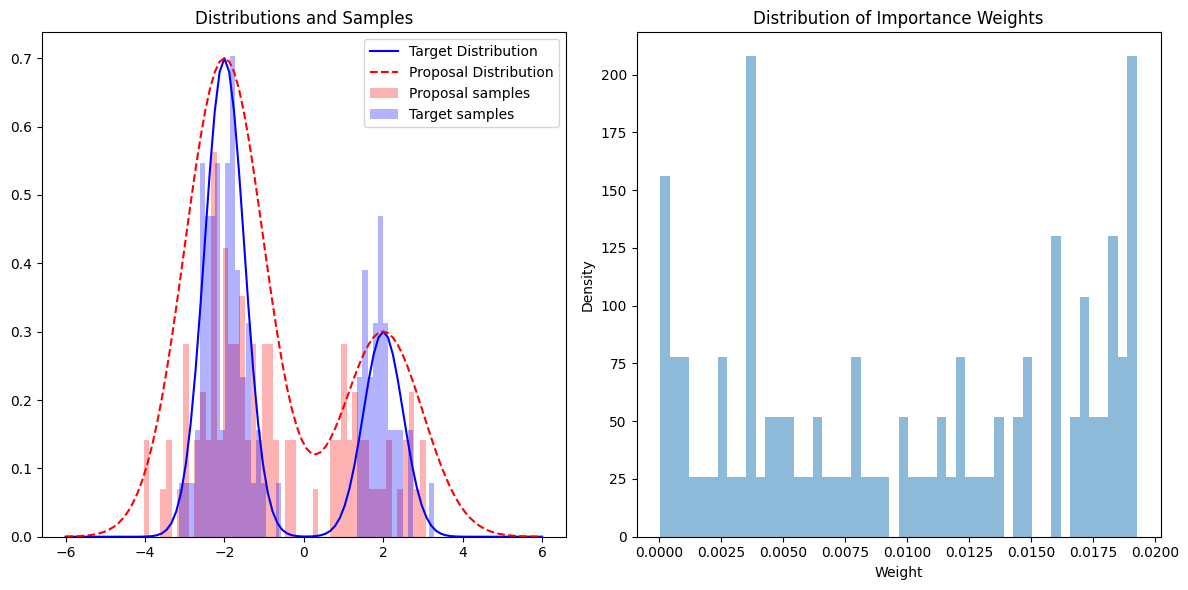

In [196]:
# Sample from target and calculate explectation
x = np.linspace(-6, 6, 100)
t_samples = np.array([r_sample(target_distribution, lambda x, x_low, x_high: proposal_uniform(x, scale=0.71, x_low=x_low, x_high=x_high), x_low=-10, x_high=10) for _ in x]  )
regular_mc_mean = np.mean(t_samples)

# Sample from proposal, and convert to 
p_samples = np.array([r_sample(proposal_distribution, lambda x, x_low, x_high: proposal_uniform(x, scale=0.71, x_low=x_low, x_high=x_high), x_low=-10, x_high=10) for _ in x]  )
weights = target_distribution(p_samples) / proposal_distribution(p_samples)
normalized_weights = weights / np.sum(weights)

# importance_sampling_mean = np.mean(weights * p_samples)
importance_sampling_mean = np.sum(weights * p_samples) / np.sum(weights)
# importance_sampling_mean = np.sum(normalized_weights * p_samples)

# Calculate true mean (numerical integration)
x_fine = np.linspace(-6, 6, 10000)
true_pdf = target_distribution(x_fine)
true_mean = np.sum(x_fine * true_pdf) * (x_fine[1] - x_fine[0]) / np.sum(true_pdf * (x_fine[1] - x_fine[0]))

print(f"True mean: {true_mean:.4f}")
print(f"Regular MC estimate: {regular_mc_mean:.4f}")
print(f"Importance Sampling estimate: {importance_sampling_mean:.4f}")

# Plotting
plt.figure(figsize=(12, 6))

# Plot distributions
plt.subplot(121)
plt.plot(x, target_distribution(x), 'b-', label='Target Distribution')
plt.plot(x, proposal_distribution(x), 'r--', label='Proposal Distribution')
plt.hist(p_samples, bins=50, density=True, alpha=0.3, color='red', label='Proposal samples')
plt.hist(t_samples, bins=50, density=True, alpha=0.3, color='blue', label='Target samples')
plt.legend()
plt.title('Distributions and Samples')

# Plot weights
plt.subplot(122)
plt.hist(normalized_weights, bins=50, density=True, alpha=0.5)
plt.title('Distribution of Importance Weights')
plt.xlabel('Weight')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [199]:
def calc_importance(n_samples=1000):
    # Regular Monte Carlo vs Importance Sampling for estimating the mean
    x = np.linspace(-6, 6, n_samples)
    t_samples = np.array([r_sample(target_distribution, lambda x, x_low, x_high: proposal_uniform(x, scale=0.71, x_low=x_low, x_high=x_high), x_low=-10, x_high=10) for _ in x]  )
    regular_mc_mean = np.mean(t_samples)

    # Sample from proposal, and convert to 
    p_samples = np.array([r_sample(proposal_distribution, lambda x, x_low, x_high: proposal_uniform(x, scale=0.71, x_low=x_low, x_high=x_high), x_low=-10, x_high=10) for _ in x]  )
    weights = target_distribution(p_samples) / proposal_distribution(p_samples)
    normalized_weights = weights / np.sum(weights)

    # importance_sampling_mean = np.sum(weights * p_samples) / np.sum(weights)
    importance_sampling_mean = np.sum(normalized_weights * p_samples)

    return regular_mc_mean, importance_sampling_mean

regular_mc = []
importance_sampling = []

for i in range(100):
    r, i = calc_importance()
    regular_mc.append(r)
    importance_sampling.append(i)

print(f"Regular: {np.mean(regular_mc)}, {np.std(regular_mc)}")
print(f"Importance: {np.mean(importance_sampling)}, {np.std(importance_sampling)}")

Regular: -0.7893897982878262, 0.06376066055256967
Importance: -0.8051898213700183, 0.07002193055383027


In [197]:
mean([1, 2])

NameError: name 'mean' is not defined